In [2]:
from __future__ import print_function
import numpy as np
import cv2

In [3]:
### CAPTURE VIDEO
cam = cv2.VideoCapture(0)
ret, img = cam.read()
cv2.destroyAllWindows() 
cam.release()

In [46]:
from matplotlib.pyplot import imshow
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = (12, 8)

In [6]:
%matplotlib inline

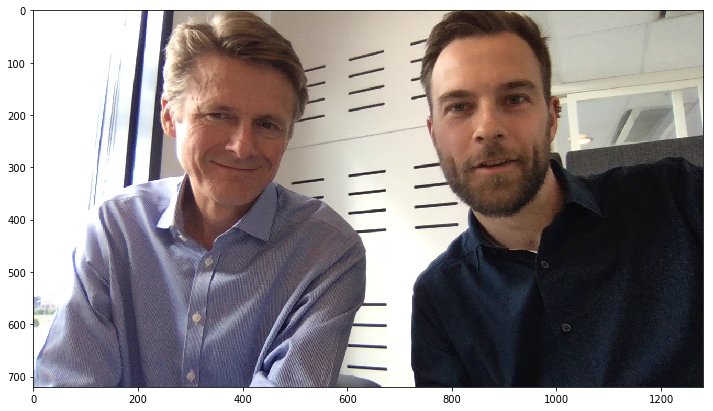

In [47]:
imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
import requests

In [9]:
import PIL

In [10]:
import StringIO

In [11]:
f = StringIO.StringIO()
PIL.Image.fromarray(img).save(f, 'png')
data = f.getvalue()

In [12]:
from donthackme import API_KEY

In [13]:
endpoint = 'https://westeurope.api.cognitive.microsoft.com/face/v1.0/detect'
args = {'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'age,gender,emotion'}
headers = {'Content-Type': 'application/octet-stream',
           'Ocp-Apim-Subscription-Key': API_KEY}

In [14]:
response = requests.post(data=data,url=endpoint,headers=headers,params=args)

In [15]:
response

<Response [200]>

In [16]:
response.json()

[{u'faceAttributes': {u'age': 37.1,
   u'emotion': {u'anger': 0.0,
    u'contempt': 0.019,
    u'disgust': 0.0,
    u'fear': 0.0,
    u'happiness': 0.298,
    u'neutral': 0.682,
    u'sadness': 0.0,
    u'surprise': 0.0},
   u'gender': u'male'},
  u'faceId': u'efce926e-2de0-4a66-ab6e-97f8e254cbf8',
  u'faceRectangle': {u'height': 246,
   u'left': 750,
   u'top': 110,
   u'width': 246}},
 {u'faceAttributes': {u'age': 47.7,
   u'emotion': {u'anger': 0.0,
    u'contempt': 0.0,
    u'disgust': 0.0,
    u'fear': 0.0,
    u'happiness': 0.984,
    u'neutral': 0.015,
    u'sadness': 0.0,
    u'surprise': 0.0},
   u'gender': u'male'},
  u'faceId': u'f2391a1c-5485-4991-9ef8-2793e0df740b',
  u'faceRectangle': {u'height': 200,
   u'left': 293,
   u'top': 153,
   u'width': 200}}]

In [23]:
from matplotlib.patches import Polygon
from matplotlib.pyplot import gcf, gca

In [58]:
?isinstance

{'gender': u'male', 'age': 37.1, u'neutral': 0.682, u'sadness': 0.0, u'happiness': 0.298, u'disgust': 0.0, u'anger': 0.0, u'surprise': 0.0, u'fear': 0.0, u'contempt': 0.019}
{'gender': u'male', 'age': 47.7, u'neutral': 0.015, u'sadness': 0.0, u'happiness': 0.984, u'disgust': 0.0, u'anger': 0.0, u'surprise': 0.0, u'fear': 0.0, u'contempt': 0.0}


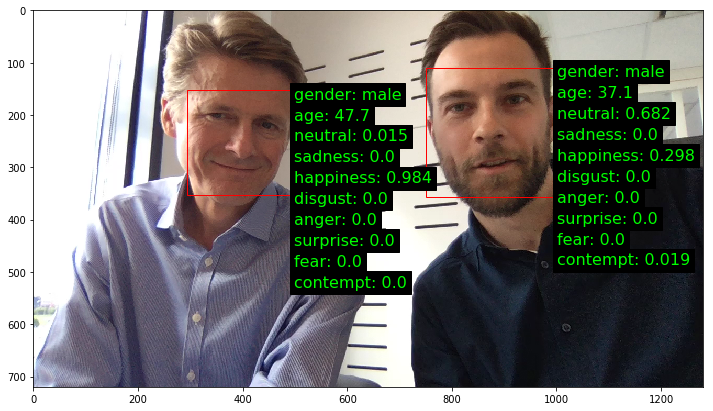

In [71]:
ax = imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for face in response.json():
    rect = face['faceRectangle']
    fattr = face['faceAttributes']
    left, top, width, height = rect['left'], rect['top'], rect['width'], rect['height']
    path = [[left, top], [left + width, top], 
            [left + width, top + height], [left, top + height]]
    ax.axes.add_patch(Polygon(path, edgecolor='red', facecolor='none'))
    disp = {'gender': fattr['gender'],
                 'age': fattr['age']}
    disp.update(fattr['emotion'])
    print(disp)
    for i, k in enumerate(disp):
        ax.axes.text(left+width+5, top + 16 + 40*i, "{0}: {1}".format(k, disp[k]),
                     color='lime', fontsize=16, backgroundcolor='black')